# Problems 9

Format: **zip** file containing the notebook and all auxiliary files. All answers either in English or German. Mathematical formulas in $\LaTeX$.

Solutions to mathematical exercises, e.g. proofs and/or calculations, should not be longer than $10$ lines. All mathematical exercises are solvable using less than $10$ lines. If you need more, it is very likely that there is a simpler approach for solving the exercise.

All solutions to programming exercises should run without errors. You can easily verify this by restarting the kernel and running all cells before handing in your solution. If your solution throws any error, we may not correct it and you may get 0 points for the exercise.

Name: <br>
Matrikelnummer:

In [12]:
# imports
import numpy as np
np.random.seed(123)

# Fill in any place that says 'Your code here'.
# You can implement auxiliary methods if you deem it proper. You may also change or extend functions, but:
# Make sure the code blocks at the end of each problem run as intended!!!

***


# Problem 1

Show that the ordered monomial feature map $\phi_1$ and the unordered monomial feature map $\phi_2$ lead to the same kernel $k(x,x') = \phi(x) \cdot \phi(x') = ???\ $. 

$$
\begin{split}
                \phi_1 :~& \mathbb{R}^2 \rightarrow \mathbb{R}^4 \hspace{5mm}\text{(ordered)}\\
                & (x_1, x_2) \mapsto (x_1^2, x_2^2, x_1 x_2, x_2 x_1)\\
                \phi_2 :~& \mathbb{R}^2 \rightarrow \mathbb{R}^3 \hspace{5mm}\text{(unordered)}\\
                & (x_1, x_2) \mapsto (x_1^2, x_2^2, \sqrt{2}x_1x_2)
                \end{split}
$$



### Bei $\phi_1: \mathbb{R}^2 \rightarrow \mathbb{R}^4$
$(x) \mapsto (x_1^2, x_2^2, x_1 x_2, x_2 x_1)$

$$ 

\phi_1 (x) \cdot \phi_1(x') = (x_1^2, x_2^2, x_1x_2, x_2x_1) \cdot (x_1'^2, x_2'^2, x_1'x_2', x_2'x_1') = (x_1^2x_1'^2 + x_2^2x_2'^2 + x_1x_2 x_1'x_2' + x_2x_1x_2'x_1')=\\
  = x_1^2x_1'^2 + x_2^2x_2'^2 + 2x_1x_2 x_1'x_2' = (x_1x_1' + x_2x_2')^2
$$

### Bei $\phi_2: \mathbb{R}^2 \rightarrow \mathbb{R}^3$
$(x) \mapsto (x_1^2, x_2^2, \sqrt{2}x_1x_2)$

$$

\phi_1 (x) \cdot \phi_1(x') = (x_1^2, x_2^2, \sqrt{2}x_1x_2) \cdot (x_1'^2, x_2'^2, \sqrt{2}x_1'x_2') = (x_1^2x_1'^2 + x_2^2x_2'^2 + \sqrt{2}x_1x_2 \cdot \sqrt{2}x_1'x_2')=\\
 = x_1^2x_1'^2 + x_2^2x_2'^2 + 2x_1x_2 x_1'x_2' = (x_1x_1' + x_2x_2')^2

$$

## Die beide geben dasselben Kernel:

 $k(x,x') = \phi(x) \cdot \phi(x') = x_1^2x_1'^2 + x_2^2x_2'^2 + 2x_1x_2 x_1'x_2' = (x_1x_1' + x_2x_2')^2 $

***

# Problem 2

Assume a formalization of the exclusive-OR (XOR) problem by a two-dimensional input $x \in \mathbb{R}^2$ where we want to assign the label $y = +1$ if $x_1$ or $x_2$ (but not both) are positive, $y = -1$ else. Consider input vectors $\mathbf{x}1 = (1,1), \ \mathbf{x}2 = (1,-1), \ \mathbf{x}3 = (-1,1)$ and $\mathbf{x}4 = (-1,-1)$. Show how a non-linear mapping of the feature representation can make this problem separable.

Wir werden eine weitere Dimension brauchen um das Problem zu lösen:

$\phi: \mathbb{R}^2 \rightarrow \mathbb{R}^3$

$(x) \mapsto (x_1^2, x_2^2, x_1x_2)$

x1 = (1, 1, 1)

x2 = (1, -1, -1)

x3 = (-1, 1, -1)

x4 = (-1, -1, 1)

Jetzt können wir die Punkten mit einer Ebene trennen,betrachten wir nun es im 3D-Raum:

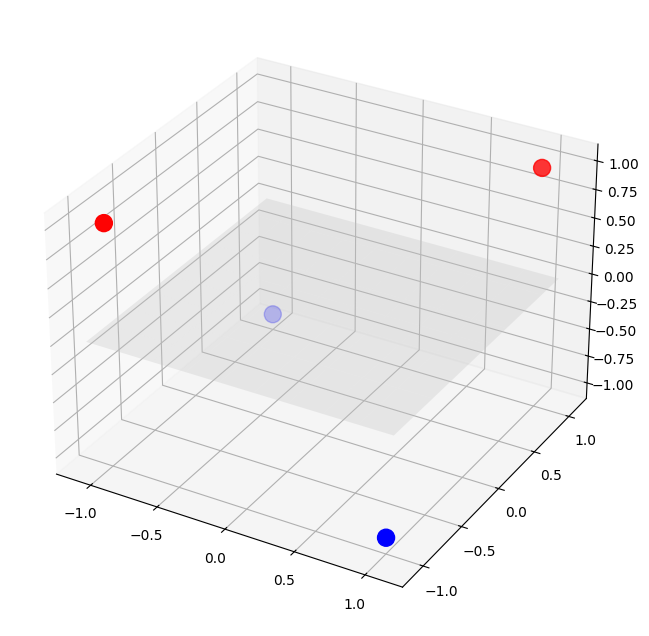

In [13]:
import matplotlib.pyplot as plt

X_phi = np.array([
    [ 1,  1,  1],
    [ 1, -1, -1],
    [-1,  1, -1],
    [-1, -1,  1]
])

y = np.array([-1, 1, 1, -1])

colors = ['red' if label == -1 else 'blue' for label in y]


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_phi[:, 0], X_phi[:, 1], X_phi[:, 2], c=colors, s=150)

x_min, x_max = X_phi[:, 0].min() - 0.1, X_phi[:, 0].max() + 0.1
y_min, y_max = X_phi[:, 1].min() - 0.1, X_phi[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10), np.linspace(y_min, y_max, 10))
zz = 0 * xx  

ax.plot_surface(xx, yy, zz, alpha=0.3, color='white') 


plt.show()

***

# Problem 3

Implement the Kernel Perceptron algorithm and use a linear and a polynomial kernel on the iris data.

In [14]:
class KernelPerceptron:
    """ 
    Implements a perceptron for multiclass classification using the kernel trick.
      
    Attributes: 
        training_data -- list -- The labeled training instances.
        power -- int -- If 1, then the used kernel is linear; if >1 - polynomial.
        N -- int -- The number of epochs.
        alpha_dict -- dict -- A dictionary that records how many times label l was wrongly predicted 
                                for instance t during training -> {(t, l):1, ...}
        kernels -- dict -- A dictionary that records already calculated kernels in order to reduce running time.
    """
    
    def __init__(self, training_data, kernel_power, epochs=500):
        self.training_data = training_data
        self.power = kernel_power
        self.N = epochs
        self.alpha_dict = {}
        self.kernels = {}
        
        
    def train(self):         
        """
        Trains the kernelized perceptron model (multiclass classification).
        """
        for epoch in range(self.N):
            np.random.shuffle(self.training_data)

            for x, y_true in self.training_data:
                y_pred = self.label_max_score(x)

                if y_pred != y_true:

                    self.alpha_dict[(tuple(x), y_true)] = \
                        self.alpha_dict.get((tuple(x), y_true), 0) + 1
                    
                    self.alpha_dict[(tuple(x), y_pred)] = \
                        self.alpha_dict.get((tuple(x), y_pred), 0) - 1

        
    
    def label_max_score(self, t):
        """
        Returns the predicted label for an instance t.

        Args:
        t -- list -- A labeled data point (one training or test vector).

        Returns:
        max_scoring_label -- integer -- The most probable class for instance t according to the model.
        """
        labels = sorted({lab for _, lab in self.training_data})
        scores = {}

        for l in labels:
            score = 0

            for (x_i, label_i), alpha_val in self.alpha_dict.items():
                if alpha_val != 0:
                    score += alpha_val * self.K(t, l, list(x_i), label_i)

            scores[l] = score

 
        return max(scores, key=scores.get)


    def accuracy(self, test_data):
        """
        Computes the overall accuracy of the model on the test data.

        Args:
        test_data -- list -- A list of document vectors and their corresponding labels.
        """
        correct = 0
        total = len(test_data)

        for x, y_true in test_data:
            if self.label_max_score(x) == y_true:
                correct += 1

        return correct/total
    
    
    def K(self, par1, par2, par3, par4):
        """
        Looks up (in self.kernels) or calculates the kernel of two block vectors phi(par1, par2) and phi(par3, par4).

        Args:
        par1, par3 -- list -- training/test instances
        par2, par4 -- int -- labels

        Returns:
        float -- the kernel of phi(par1, par2) and phi(par3, par4)
        """

        key = (tuple(par1), par2, tuple(par3), par4)
        
        if key in self.kernels:
            return self.kernels[key]
        
        if par2 != par4:
            return 0.0
        
        
        v1 = phi(par1, par2)
        v2 = phi(par3, par4)
        
        kernel_value = (np.dot(v1, v2)) ** self.power
        self.kernels[key] = kernel_value
        
        return kernel_value


'''
General functions   - you may change these/use solutions from previous exercises
'''

label_names = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


def read_data(filename):
    """
    Reads an annotated corpus into a list.
    
    Args:
    filename -- str -- The name of the corpus file.
    
    Returns:
    documents -- list -- A list of all documents with their corresponding label.
    """
    data = []

    with open(filename, "r") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue 
            data.append(line.split(","))
    return data
    

def get_vectors(data):
    """
    Cleans up the document representations. 
    ['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'] -> [(5.1, 3.5, 1.4, 0.2), 0]
    
    Args:
    data -- list -- A list of all documents with their corresponding label.
    
    Returns:
    vectors -- list -- A list of all document vectors with their corresponding label.
    """
    vectors = []
    
    for vector in data:
        label_str = vector[-1]
        label = label_names[label_str]
        features = [float(x) for x in vector[:-1]]
        vectors.append((np.array(features, dtype=float), label))    
    return vectors


def phi(t, label):
    """
    Block vector.
    
    Args:
    t -- list/np.array -- A data point (one training or test vector).
    label -- integer -- The class.
    
    Returns:
    block_vector -- list/np.array -- The pumped-up training instance t.
    """
    vector_dim = len(t)
    
    block_vector = np.zeros(3 * vector_dim)
    start = label * vector_dim
    block_vector[start:start+vector_dim] = t
    return block_vector


def split_train_test(data):
    """
    Splits iris.data into training and test sets.
    """
    train, test = [], []

    for i, item in enumerate(data):
        if (i+1) % 5 == 0:
            test.append(item)
        else:
            train.append(item)
    return train, test

In [15]:
data = get_vectors(read_data('iris.data'))    # subject to change depending on your implementation
train, test = split_train_test(data)


lkp = KernelPerceptron(training_data=train, kernel_power=1)
lkp.train()          # this takes a while
print('Linear Kernel Accuracy:', lkp.accuracy(test))

pkp = KernelPerceptron(training_data=train, kernel_power=2)
pkp.train()          # this takes a while
print('Polynomial Kernel Accuracy:', pkp.accuracy(test))

# if it takes too long, try fewer epochs

Linear Kernel Accuracy: 0.9666666666666667
Polynomial Kernel Accuracy: 0.9333333333333333
